EOF
Top-5100
Execution time: 925.703 seconds.
Find:143
Top_ARE: 0.0007
Top_AAE: 0.1678
Estimate time:  0.667 seconds.

For copy
Top-5100
Top_dict with 990.3359375 kbytes.
Find 0.966 of Heavy Hitters
Execution time: 925.703 seconds.


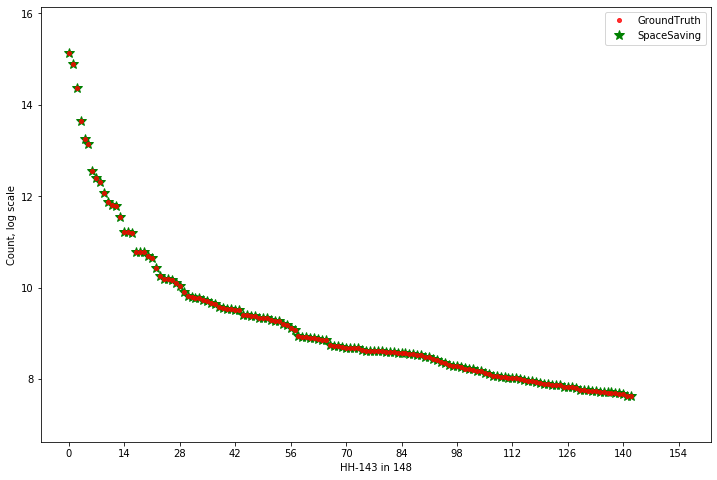

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\SS\\kosarak\\HH\\Top_5100\\SS_HH_148.csv'

In [17]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename=dataset+'.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth
# =============================Initialize=============================
w=0
d=0
size=5100
topk=5100
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()
    # Top_dict[x]=[count_x,error_x]

#item_count=100
# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        #item_count-=1
        if not e:
            print('EOF')
            break
        else:
            total_count+=1
            item=DS.ssNode(e,1)
            #item_count-=1
            # print("read {}th element: {}".format(item_count,element))
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID][0]+=item.count
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=[item.count,item.error]
                else:
                    min_ele = min(Top_dict, key=lambda x: Top_dict.get(x)[0])
                        # find e_min
                    Top_dict[item.ID]=[Top_dict[min_ele][0]+item.count,Top_dict[min_ele][0]]
                        # update c_min,c_error
                    Top_dict.pop(min_ele)
                        # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item][0]>total_count*heavy_ratio:
        if (Top_dict[item][0]-Top_dict[item][1])>=total_count*heavy_ratio:
            HH[item]=Top_dict[item][0]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))
TF.Plot_hh_compare(temp,HH,"SpaceSaving")

# result to csv
path="..\\result\\SS\\"+dataset+"\\HH\\Top_"+str(TC.size)
filename='SS_HH'+'_'+str(len(gr_set))+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
Top-4000
Execution time: 794.009 seconds.
Find:130
Top_ARE: 0.0017
Top_AAE: 0.4538
Estimate time:  0.672 seconds.

For copy
Top-4000
Top_dict with 808.703125 kbytes.
Find 0.878 of Heavy Hitters
Execution time: 794.009 seconds.


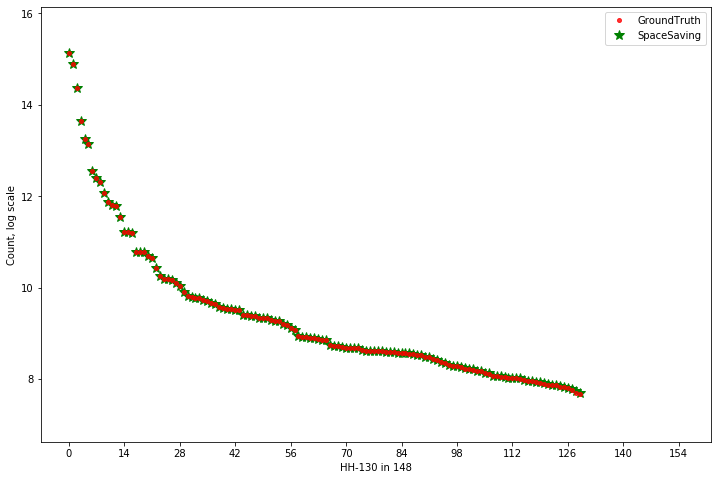

In [18]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename=dataset+'.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth
# =============================Initialize=============================
w=0
d=0
size=4000
topk=4000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()
    # Top_dict[x]=[count_x,error_x]

#item_count=100
# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        #item_count-=1
        if not e:
            print('EOF')
            break
        else:
            total_count+=1
            item=DS.ssNode(e,1)
            #item_count-=1
            # print("read {}th element: {}".format(item_count,element))
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID][0]+=item.count
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=[item.count,item.error]
                else:
                    min_ele = min(Top_dict, key=lambda x: Top_dict.get(x)[0])
                        # find e_min
                    Top_dict[item.ID]=[Top_dict[min_ele][0]+item.count,Top_dict[min_ele][0]]
                        # update c_min,c_error
                    Top_dict.pop(min_ele)
                        # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item][0]>total_count*heavy_ratio:
        if (Top_dict[item][0]-Top_dict[item][1])>=total_count*heavy_ratio:
            HH[item]=Top_dict[item][0]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))
TF.Plot_hh_compare(temp,HH,"SpaceSaving")

# result to csv
path="..\\result\\SS\\"+dataset+"\\HH\\Top_"+str(TC.size)
filename='SS_HH'+'_'+str(len(gr_set))+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

In [19]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename=dataset+'.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth
# =============================Initialize=============================
w=0
d=0
size=3000
topk=3000
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()
    # Top_dict[x]=[count_x,error_x]

#item_count=100
# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        #item_count-=1
        if not e:
            print('EOF')
            break
        else:
            total_count+=1
            item=DS.ssNode(e,1)
            #item_count-=1
            # print("read {}th element: {}".format(item_count,element))
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID][0]+=item.count
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=[item.count,item.error]
                else:
                    min_ele = min(Top_dict, key=lambda x: Top_dict.get(x)[0])
                        # find e_min
                    Top_dict[item.ID]=[Top_dict[min_ele][0]+item.count,Top_dict[min_ele][0]]
                        # update c_min,c_error
                    Top_dict.pop(min_ele)
                        # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item][0]>total_count*heavy_ratio:
        if (Top_dict[item][0]-Top_dict[item][1])>=total_count*heavy_ratio:
            HH[item]=Top_dict[item][0]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))
TF.Plot_hh_compare(temp,HH,"SpaceSaving")

# result to csv
path="..\\result\\SS\\"+dataset+"\\HH\\Top_"+str(TC.size)
filename='SS_HH'+'_'+str(len(gr_set))+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

KeyboardInterrupt: 